### 批量梯度下降

In [2]:
#!/usr/bin/python  
#coding=utf-8  
import numpy as np  
from scipy import stats  
import matplotlib.pyplot as plt  

# 构造训练数据  
x = np.arange(0., 10., 0.2)  
m = len(x)  # 训练数据点数目  
print(m)  
x0 = np.full(m, 1.0)  
input_data = np.vstack([x0, x]).T  # 将偏置b作为权向量的第一个分量  
target_data = 2 * x + 5 + np.random.randn(m)  

50


In [3]:
print(x)
print(x0)
print(input_data)
print(target_data)

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8
  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8
  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8
  9.   9.2  9.4  9.6  9.8]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[[ 1.   0. ]
 [ 1.   0.2]
 [ 1.   0.4]
 [ 1.   0.6]
 [ 1.   0.8]
 [ 1.   1. ]
 [ 1.   1.2]
 [ 1.   1.4]
 [ 1.   1.6]
 [ 1.   1.8]
 [ 1.   2. ]
 [ 1.   2.2]
 [ 1.   2.4]
 [ 1.   2.6]
 [ 1.   2.8]
 [ 1.   3. ]
 [ 1.   3.2]
 [ 1.   3.4]
 [ 1.   3.6]
 [ 1.   3.8]
 [ 1.   4. ]
 [ 1.   4.2]
 [ 1.   4.4]
 [ 1.   4.6]
 [ 1.   4.8]
 [ 1.   5. ]
 [ 1.   5.2]
 [ 1.   5.4]
 [ 1.   5.6]
 [ 1.   5.8]
 [ 1.   6. ]
 [ 1.   6.2]
 [ 1.   6.4]
 [ 1.   6.6]
 [ 1.   6.8]
 [ 1.   7. ]
 [ 1.   7.2]
 [ 1.   7.4]
 [ 1.   7.6]
 [ 1.   7.8]
 [ 1.   8. ]
 [ 1.   

loop count = 1 	w: [ 2.32347108  3.83121901]
loop count = 2 	w: [ 2.01430873  1.57719629]
loop count = 3 	w: [ 2.27284007  3.04367308]
loop count = 4 	w: [ 2.15915802  2.07551672]
loop count = 5 	w: [ 2.28835839  2.7007213 ]
loop count = 6 	w: [ 2.25792361  2.28331598]
loop count = 7 	w: [ 2.33127488  2.54831158]
loop count = 8 	w: [ 2.33603466  2.36683824]
loop count = 9 	w: [ 2.38501743  2.47764114]
loop count = 10 	w: [ 2.40440434  2.39727497]
loop count = 11 	w: [ 2.44251162  2.44211111]
loop count = 12 	w: [ 2.46772868  2.40511093]
loop count = 13 	w: [ 2.50074993  2.42176186]
loop count = 14 	w: [ 2.52804064  2.40339803]
loop count = 15 	w: [ 2.55846596  2.40804229]
loop count = 16 	w: [ 2.58623216  2.39772258]
loop count = 17 	w: [ 2.61513838  2.39728712]
loop count = 18 	w: [ 2.64270598  2.39047377]
loop count = 19 	w: [ 2.67056447  2.38792355]
loop count = 20 	w: [ 2.69765485  2.38267171]
loop count = 21 	w: [ 2.7246774   2.37927495]
loop count = 22 	w: [ 2.75118103  2.3747502

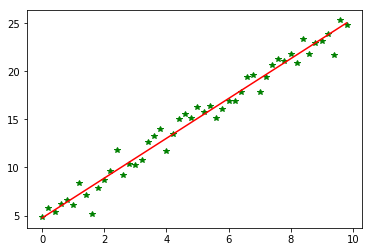

In [4]:
# 两种终止条件  
loop_max = 10000  # 最大迭代次数(防止死循环)  
epsilon = 1e-3  

# 初始化权值  
np.random.seed(0)  
theta = np.random.randn(2)  
print(theta)

alpha = 0.001  # 步长(注意取值过大会导致振荡即不收敛,过小收敛速度变慢)  
diff = 0.  
error = np.zeros(2)  
count = 0  # 循环次数  
finish = 0  # 终止标志  

while count < loop_max:  
    count += 1  

    # 标准梯度下降是在权值更新前对所有样例汇总误差，而随机梯度下降的权值是通过考查某个训练样例来更新的  
    # 在标准梯度下降中，权值更新的每一步对多个样例求和，需要更多的计算  
    sum_m = np.zeros(2)  
    for i in range(m):  
        dif = (np.dot(theta, input_data[i]) - target_data[i]) * input_data[i]  
        sum_m = sum_m + dif  # 当alpha取值过大时,sum_m会在迭代过程中会溢出  

    theta = theta - alpha * sum_m  # 注意步长alpha的取值,过大会导致振荡  
    # theta = theta - 0.005 * sum_m      # alpha取0.005时产生振荡,需要将alpha调小  

    # 判断是否已收敛  
    if np.linalg.norm(theta - error) < epsilon:  
        finish = 1  
        break  
    else:  
        error = theta  
    print('loop count = %d' % count, '\tw:',theta)  
print('loop count = %d' % count, '\tw:',theta)  

# check with scipy linear regression  
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, target_data)  
print('intercept = %s slope = %s' % (intercept, slope))  

plt.plot(x, target_data, 'g*')  
plt.plot(x, theta[1] * x + theta[0], 'r')  
plt.show()  

### 随机梯度下降

loop count = 306 	w: [ 5.63420963  1.88616463]
intercept = 5.71919477408 slope = 1.87100184202


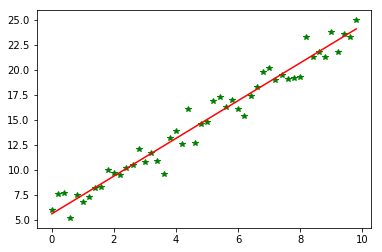

In [5]:
#!/usr/bin/python  
#coding=utf-8  
import numpy as np  
from scipy import stats  
import matplotlib.pyplot as plt  

# 构造训练数据  
x = np.arange(0., 10., 0.2)  
m = len(x)  # 训练数据点数目  
x0 = np.full(m, 1.0)  
input_data = np.vstack([x0, x]).T  # 将偏置b作为权向量的第一个分量  
target_data = 2 * x + 5 + np.random.randn(m)  

# 两种终止条件  
loop_max = 10000  # 最大迭代次数(防止死循环)  
epsilon = 1e-3  

# 初始化权值  
np.random.seed(0)  
theta = np.random.randn(2)  
# w = np.zeros(2)  

alpha = 0.001  # 步长(注意取值过大会导致振荡,过小收敛速度变慢)  
diff = 0.  
error = np.zeros(2)  
count = 0  # 循环次数  
finish = 0  # 终止标志  
######-随机梯度下降算法  
while count < loop_max:  
    count += 1  

    # 遍历训练数据集，不断更新权值  
    for i in range(m):  
        diff = np.dot(theta, input_data[i]) - target_data[i]  # 训练集代入,计算误差值  

        # 采用随机梯度下降算法,更新一次权值只使用一组训练数据  
        theta = theta - alpha * diff * input_data[i]  

        # ------------------------------终止条件判断-----------------------------------------  
        # 若没终止，则继续读取样本进行处理，如果所有样本都读取完毕了,则循环重新从头开始读取样本进行处理。  

    # ----------------------------------终止条件判断-----------------------------------------  
    # 注意：有多种迭代终止条件，和判断语句的位置。终止判断可以放在权值向量更新一次后,也可以放在更新m次后。  
    if np.linalg.norm(theta - error) < epsilon:     # 终止条件：前后两次计算出的权向量的绝对误差充分小  
        finish = 1  
        break  
    else:  
        error = theta  
print('loop count = %d' % count,  '\tw:',theta)  


# check with scipy linear regression  
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, target_data)  
print('intercept = %s slope = %s' % (intercept, slope))  

plt.plot(x, target_data, 'g*')  
plt.plot(x, theta[1] * x + theta[0], 'r')  
plt.show()  

### Mini-batch

50
loopcount = 1 	w: [ 1.86445657  0.97874291]
loopcount = 2 	w: [ 1.93847703  1.38970918]
loopcount = 3 	w: [ 1.99373292  1.68150507]
loopcount = 4 	w: [ 2.03564122  1.88857609]
loopcount = 5 	w: [ 2.06805323  2.03541176]
loopcount = 6 	w: [ 2.0937071   2.13942323]
loopcount = 7 	w: [ 2.11454956  2.21298923]
loopcount = 8 	w: [ 2.13196471  2.26491055]
loopcount = 9 	w: [ 2.14693658  2.30144425]
loopcount = 10 	w: [ 2.16016482  2.32703887]
loopcount = 11 	w: [ 2.17214687  2.34485717]
loopcount = 12 	w: [ 2.18323639  2.35714773]
loopcount = 13 	w: [ 2.19368485  2.36550923]
loopcount = 14 	w: [ 2.20367106  2.37107826]
loopcount = 15 	w: [ 2.21332214  2.3746629 ]
loopcount = 16 	w: [ 2.22272852  2.37683765]
loopcount = 17 	w: [ 2.23195447  2.37801097]
loopcount = 18 	w: [ 2.24104572  2.37847325]
loopcount = 19 	w: [ 2.2500348   2.37843096]
loopcount = 20 	w: [ 2.25894486  2.37803086]
loopcount = 21 	w: [ 2.26779235  2.37737731]
loopcount = 22 	w: [ 2.276589    2.37654451]
loopcount = 23 	

loopcount = 514 	w: [ 4.72760904  2.01765391]
loopcount = 515 	w: [ 4.73011146  2.01728634]
loopcount = 516 	w: [ 4.73260755  2.0169197 ]
loopcount = 517 	w: [ 4.73509733  2.01655399]
loopcount = 518 	w: [ 4.7375808  2.0161892]
loopcount = 519 	w: [ 4.74005799  2.01582534]
loopcount = 520 	w: [ 4.74252891  2.01546239]
loopcount = 521 	w: [ 4.74499358  2.01510037]
loopcount = 522 	w: [ 4.74745202  2.01473926]
loopcount = 523 	w: [ 4.74990423  2.01437906]
loopcount = 524 	w: [ 4.75235024  2.01401978]
loopcount = 525 	w: [ 4.75479005  2.0136614 ]
loopcount = 526 	w: [ 4.7572237   2.01330394]
loopcount = 527 	w: [ 4.75965119  2.01294737]
loopcount = 528 	w: [ 4.76207253  2.01259171]
loopcount = 529 	w: [ 4.76448775  2.01223695]
loopcount = 530 	w: [ 4.76689685  2.01188309]
loopcount = 531 	w: [ 4.76929986  2.01153012]
loopcount = 532 	w: [ 4.77169679  2.01117804]
loopcount = 533 	w: [ 4.77408766  2.01082686]
loopcount = 534 	w: [ 4.77647247  2.01047656]
loopcount = 535 	w: [ 4.77885125  2.

loopcount = 837 	w: [ 5.28027561  1.93647496]
loopcount = 838 	w: [ 5.28137959  1.93631281]
loopcount = 839 	w: [ 5.28248076  1.93615106]
loopcount = 840 	w: [ 5.28357915  1.93598972]
loopcount = 841 	w: [ 5.28467477  1.93582879]
loopcount = 842 	w: [ 5.2857676   1.93566827]
loopcount = 843 	w: [ 5.28685768  1.93550815]
loopcount = 844 	w: [ 5.28794499  1.93534844]
loopcount = 845 	w: [ 5.28902956  1.93518913]
loopcount = 846 	w: [ 5.29011138  1.93503023]
loopcount = 847 	w: [ 5.29119046  1.93487173]
loopcount = 848 	w: [ 5.29226681  1.93471363]
loopcount = 849 	w: [ 5.29334044  1.93455592]
loopcount = 850 	w: [ 5.29441135  1.93439862]
loopcount = 851 	w: [ 5.29547956  1.93424172]
loopcount = 852 	w: [ 5.29654506  1.93408521]
loopcount = 853 	w: [ 5.29760786  1.9339291 ]
loopcount = 854 	w: [ 5.29866797  1.93377339]
loopcount = 855 	w: [ 5.2997254   1.93361806]
loopcount = 856 	w: [ 5.30078016  1.93346314]
loopcount = 857 	w: [ 5.30183225  1.9333086 ]
loopcount = 858 	w: [ 5.30288167  

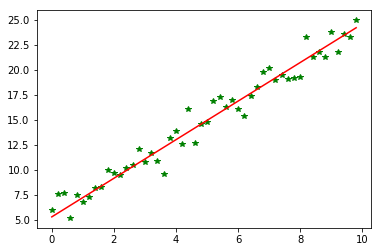

In [9]:
#!/usr/bin/python  
#coding=utf-8  
import numpy as np  
from scipy import stats  
import matplotlib.pyplot as plt  

# 构造训练数据  
x = np.arange(0.,10.,0.2)  
m = len(x)  # 训练数据点数目  
print(m)  
x0 = np.full(m, 1.0)  
input_data = np.vstack([x0, x]).T  # 将偏置b作为权向量的第一个分量  
target_data = 2 *x + 5 +np.random.randn(m)  

# 两种终止条件  
loop_max = 10000  #最大迭代次数(防止死循环)  
epsilon = 1e-3  

# 初始化权值  
np.random.seed(0)  
theta = np.random.randn(2)  

alpha = 0.001  #步长(注意取值过大会导致振荡即不收敛,过小收敛速度变慢)  
diff = 0.  
error = np.zeros(2)  
count = 0  #循环次数  
finish = 0  #终止标志  
minibatch_size = 5  #每次更新的样本数  
while count < loop_max:  
    count += 1  

    # minibatch梯度下降是在权值更新前对所有样例汇总误差，而随机梯度下降的权值是通过考查某个训练样例来更新的  
    # 在minibatch梯度下降中，权值更新的每一步对多个样例求和，需要更多的计算  

    for i in range(1,m,minibatch_size):  
        sum_m = np.zeros(2)  
        for k in range(i-1,i+minibatch_size-1,1):  
            dif = (np.dot(theta, input_data[k]) - target_data[k]) *input_data[k]  
            sum_m = sum_m + dif  #当alpha取值过大时,sum_m会在迭代过程中会溢出  

        theta = theta- alpha * (1.0/minibatch_size) * sum_m #注意步长alpha的取值,过大会导致振荡  

    # 判断是否已收敛  
    if np.linalg.norm(theta- error) < epsilon:  
        finish = 1  
        break  
    else:  
        error = theta  
    print('loopcount = %d'% count, '\tw:',theta)  
print('loop count = %d'% count, '\tw:',theta)  

# check with scipy linear regression  
slope, intercept, r_value, p_value,slope_std_error = stats.linregress(x, target_data)  
print('intercept = %s slope = %s'% (intercept, slope))  

plt.plot(x, target_data, 'g*')  
plt.plot(x, theta[1]* x +theta[0],'r')  
plt.show()  